In [2]:
import zipfile

# Unzip the archive
local_zip = 'CNN_data/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
import os

base_dir = 'CNN_data\\cats_and_dogs_filtered'
# Change the base_dir to where you put dataset
print("Contents of base directory:")
print(os.listdir(base_dir))
print("\nContents of train directory:")
print(os.listdir(f'{base_dir}\\train'))
print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}\\validation'))

Contents of base directory:
['train', 'validation', 'vectorize.py']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [4]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print("\nContents of train directory:")
print(os.listdir(f'{base_dir}\\train'))
print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}\\validation'))


Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [5]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
print(train_cat_fnames[:10])
print(train_dog_fnames[:10])
print('total training cat images :', len(os.listdir(train_cats_dir)))
print('total training dog images :', len(os.listdir(train_dogs_dir)))
print('total validation cat images :', len(os.listdir(validation_cats_dir)))
print('total validation dog images :', len(os.listdir(validation_dogs_dir)))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


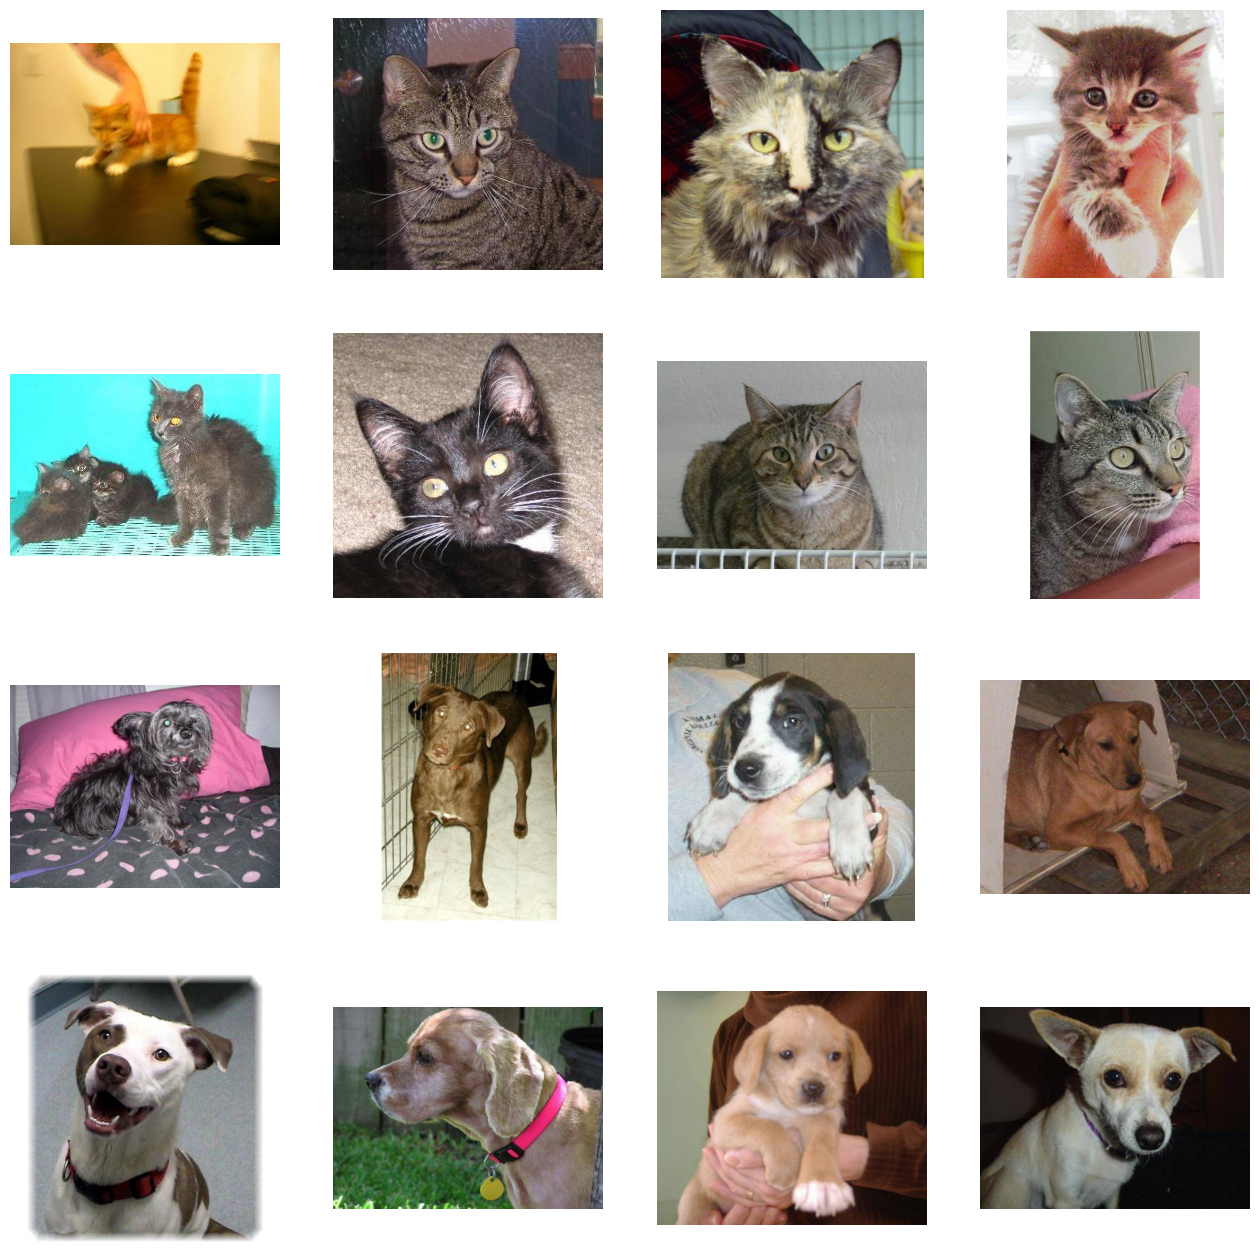

In [7]:
% matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
pic_index = 0  # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[pic_index - 8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[pic_index - 8:pic_index]]
for i, img_path in enumerate(next_cat_pix + next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')  # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron.
    # It will contain a value from 0-1 where 0 for 1 class ('cats')
    # and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale=1.0 / 255.)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.)
# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150,

                                                                     150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

Epoch 1/15
100/100 - 80s - loss: 0.7070 - accuracy: 0.5425 - val_loss: 0.8507 - val_accuracy: 0.5020 - 80s/epoch - 801ms/step
Epoch 2/15
100/100 - 46s - loss: 0.6409 - accuracy: 0.6495 - val_loss: 0.5791 - val_accuracy: 0.6950 - 46s/epoch - 463ms/step
Epoch 3/15
100/100 - 43s - loss: 0.5717 - accuracy: 0.7190 - val_loss: 0.5638 - val_accuracy: 0.7180 - 43s/epoch - 432ms/step
Epoch 4/15
100/100 - 46s - loss: 0.5120 - accuracy: 0.7470 - val_loss: 0.6024 - val_accuracy: 0.6640 - 46s/epoch - 461ms/step
Epoch 5/15
100/100 - 42s - loss: 0.4534 - accuracy: 0.7830 - val_loss: 0.5632 - val_accuracy: 0.7210 - 42s/epoch - 418ms/step
Epoch 6/15
100/100 - 41s - loss: 0.4017 - accuracy: 0.8060 - val_loss: 0.5804 - val_accuracy: 0.7270 - 41s/epoch - 412ms/step
Epoch 7/15
100/100 - 44s - loss: 0.3285 - accuracy: 0.8605 - val_loss: 0.5781 - val_accuracy: 0.7380 - 44s/epoch - 445ms/step
Epoch 8/15
100/100 - 43s - loss: 0.2599 - accuracy: 0.8885 - val_loss: 0.6715 - val_accuracy: 0.7210 - 43s/epoch - 431

1/1 [==============================] - 0s 326ms/step


C:\Users\cosyt\AppData\Local\Temp\ipykernel_5004\2414277860.py:39: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()
C:\Users\cosyt\AppData\Local\Temp\ipykernel_5004\2414277860.py:42: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


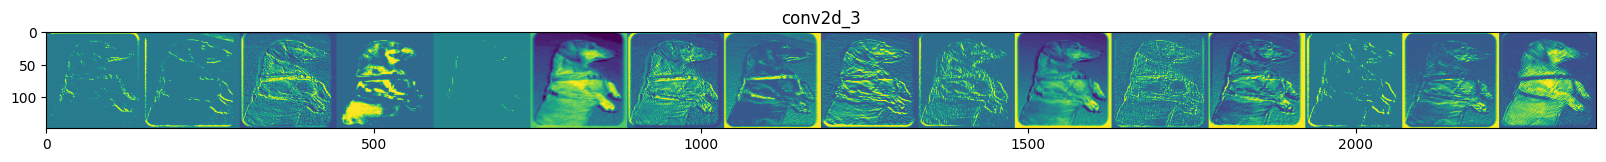

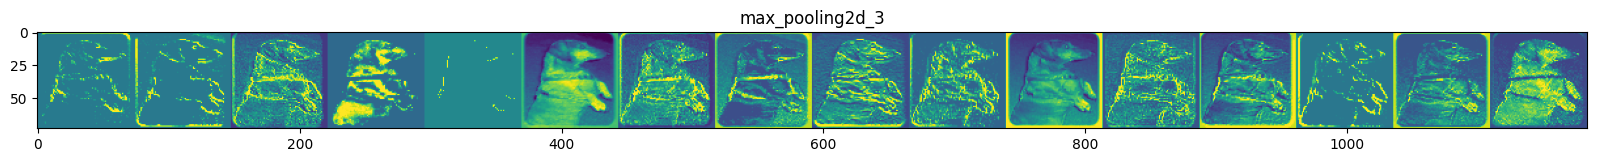

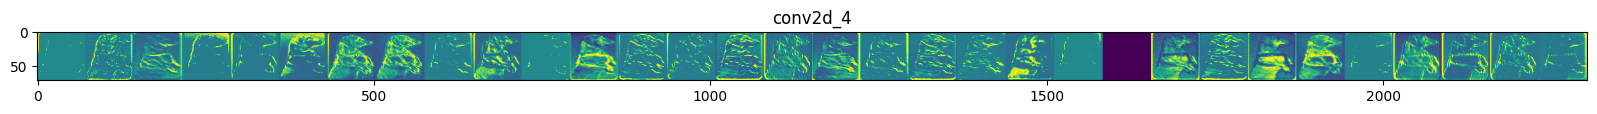

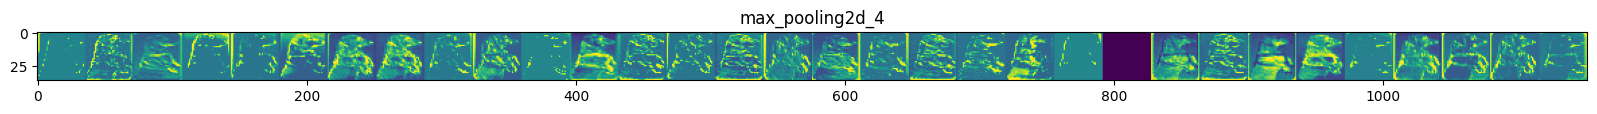

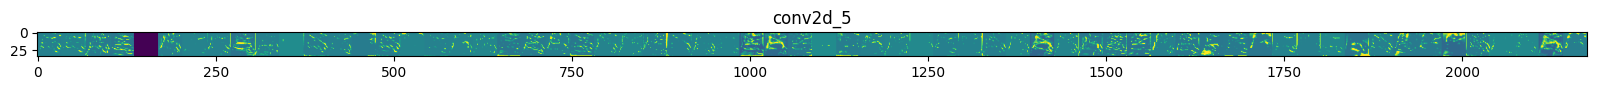

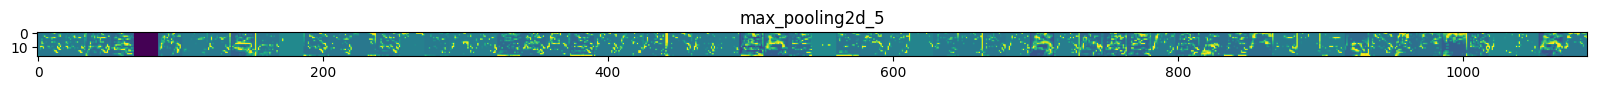

In [14]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)
# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150,3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150,150, 3)
# Scale by 1/255
x /= 255.0
# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
# These are the names of the layers, so we can have them as part of our plot

layer_names = [layer.name for layer in model.layers]
# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size = feature_map.shape[1]  # feature map shape (1, size, size, n_features)
        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size: (i + 1) * size] = x  # Tile each filter into a horizontal grid
        #-----------------
        # Display the grid
        #-----------------
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [18]:
import numpy as np
#from google.colab import files
from tensorflow.keras.preprocessing import image

#uploaded=files.upload()
#for fn in uploaded.keys():
fn = 'Acat.jpg'  # change it to your image file
# predicting images
path = 'C:\\Users\\cosyt\\PycharmProjects\\MachineLearning\\CNN_data\\cats_and_dogs_filtered\\test\\Acat.jpg'  # change it to your image
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0] > 0.5:
    print(fn + " is a dog")
else:
    print(fn + " is a cat")

1/1 [==============================] - 0s 55ms/step
[0.12062921]
Acat.jpg is a cat


In [23]:
import os
import numpy as np  # linear algebra
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import PIL
import PIL.Image
from tensorflow import keras


# Trains a model to classify images of 3 classes: cat, dog, and panda
def gen_model():
    # Defines & compiles the model
    model = tf.keras.models.Sequential(
        [tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
         tf.keras.layers.MaxPooling2D(2, 2),
         keras.layers.Dropout(rate=0.15),  #adding dropout regularization throughout the model to deal with overfitting
         # The second convolution
         tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
         tf.keras.layers.MaxPooling2D(2, 2),
         keras.layers.Dropout(rate=0.1),
         # The third convolution
         tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
         tf.keras.layers.MaxPooling2D(2, 2),
         keras.layers.Dropout(rate=0.10),
         # Flatten the results to feed into a DNN
         tf.keras.layers.Flatten(),
         # 512 neuron hidden layer
         tf.keras.layers.Dense(512, activation='relu'),
         # 3 output neuron for the 3 classes of Animal Images
         tf.keras.layers.Dense(3, activation='softmax')
         ])
    from tensorflow.keras.optimizers import RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer="adam",
                  metrics=['acc'])
    return model

In [26]:
# Trains a model to classify images of 3 classes: cat, dog, and panda
def train_test_animals():
    # Creates an instance of an ImageDataGenerator called train_datagen, and a train_generator, train_datagen.flow_from_directory
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    #splits data into training and testing(validation) sets
    train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.25)
    import matplotlib.pyplot as plt
    #training data
    train_generator = train_datagen.flow_from_directory(
        'C:\\Users\\cosyt\\PycharmProjects\\MachineLearning\\CNN_data\\CNN_MultiClass_data\\animals',
        # Source directory
        target_size=(150, 150),  # Resizes images
        batch_size=15,
        class_mode='categorical', subset='training')

    epochs = 15
    #Testing data
    validation_generator = train_datagen.flow_from_directory(
        'C:\\Users\\cosyt\\PycharmProjects\\MachineLearning\\CNN_data\\CNN_MultiClass_data\\validation',
        target_size=(150, 150),
        batch_size=15,
        class_mode='categorical',
        subset='validation')  # set as validation data
    model = gen_model()
    #Model fitting for a number of epochs
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=150,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=50,
        verbose=1)

    acc = history.history['acc']

    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    #This code is used to plot the training and validation accuracy
    epochs_range = range(epochs)
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
    # returns accuracy of training
    print("Training Accuracy:"), print(history.history['acc'][-1])
    print("Testing Accuracy:"), print(history.history['val_acc'][-1])

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/15


C:\Users\cosyt\AppData\Local\Temp\ipykernel_5004\3494346579.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


150/150 [==============================] - 45s 291ms/step - loss: 1.0225 - acc: 0.5369 - val_loss: 0.7808 - val_acc: 0.6253
Epoch 2/15
150/150 [==============================] - 46s 304ms/step - loss: 0.6818 - acc: 0.6569 - val_loss: 0.7067 - val_acc: 0.6520
Epoch 3/15
150/150 [==============================] - 47s 311ms/step - loss: 0.6089 - acc: 0.7111 - val_loss: 0.6710 - val_acc: 0.6707
Epoch 4/15
150/150 [==============================] - 47s 312ms/step - loss: 0.4994 - acc: 0.7716 - val_loss: 0.6423 - val_acc: 0.6973
Epoch 5/15
150/150 [==============================] - 48s 317ms/step - loss: 0.4617 - acc: 0.8018 - val_loss: 0.6679 - val_acc: 0.6773
Epoch 6/15
150/150 [==============================] - 47s 315ms/step - loss: 0.3532 - acc: 0.8418 - val_loss: 0.7291 - val_acc: 0.6853
Epoch 7/15
150/150 [==============================] - 49s 325ms/step - loss: 0.2679 - acc: 0.8867 - val_loss: 0.7596 - val_acc: 0.6920
Epoch 8/15
150/150 [==============================] - 50s 331ms/st

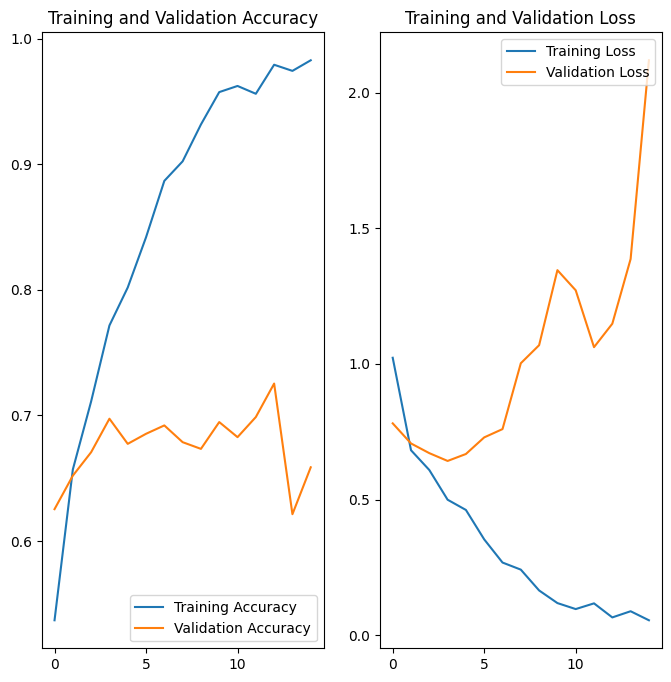

Training Accuracy:
0.9826666712760925
Testing Accuracy:
0.6586666703224182


In [27]:
train_test_animals()